In [1]:
import geopandas as gpd
import cobra.postgres.interface as pgi
import cobra.utils.filehandling as fh
import cobra.utils.jobhandling as jh
import geopandas as gpd
import cobra.utils.geodatahandling as gdh

In [2]:
#download_file = 'https://download.geofabrik.de/europe/switzerland-latest.osm.pbf'
#country = 'Swiss'
download_file = 'https://download.geofabrik.de/europe/great-britain-latest.osm.pbf'
country = 'gb'

In [3]:
fileman = fh.Filemanager()
jobman = jh.Jobmanager()

In [ ]:
#jobman.delete_jobs()

In [4]:
fileman.download_plain_file(download_file, country)

In [5]:
datasets = fileman.get_data(datatype='OSM PBF')
dataset = datasets[datasets['Dataset'] == country].iloc[0]

In [6]:
jobman.create_import_job_from_dataset(dataset, f'{country}power', style='power.style')

create_import_job_from_dataset
OSM PBF


In [9]:
jobman.get_jobs(df=True)

,UUID,Name,Job Type,Date created,Date started,Date finished,Priority,Status
0,bb55ec4d-4bd3-4282-9522-907c7674a052,Load OSM from GB,osm2pg,"Mon, 14 Feb 2022 15:06:26 GMT",None,None,42,Failed
1,274d8088-26a5-4000-aca4-e5a3662d1387,Load OSM from gb,osm2pg,"Mon, 14 Feb 2022 15:08:52 GMT",None,"Mon, 14 Feb 2022 15:49:52 GMT",42,Finished
2,6ed1f8f4-d52d-4a76-9660-123dc6c857ad,Export PG,pg2x,"Wed, 09 Feb 2022 15:17:14 GMT",None,"Wed, 09 Feb 2022 15:17:20 GMT",42,Finished
3,8409297f-1bda-4bb5-8881-c5bf0a8ec54a,Load OSM from GB,osm2pg,"Mon, 14 Feb 2022 15:02:20 GMT",None,None,42,Failed
4,89d6a86b-d5a9-4ce5-85e0-06441306bdfc,Load OSM from GB,osm2pg,"Mon, 14 Feb 2022 15:02:45 GMT",None,None,42,Failed


In [10]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_line osm WHERE power IS NOT NULL"
pg_interface = pgi.PgInterface()
conn = pg_interface.get_connection()
powerlines = gpd.GeoDataFrame.from_postgis(sql, conn)

<AxesSubplot:>

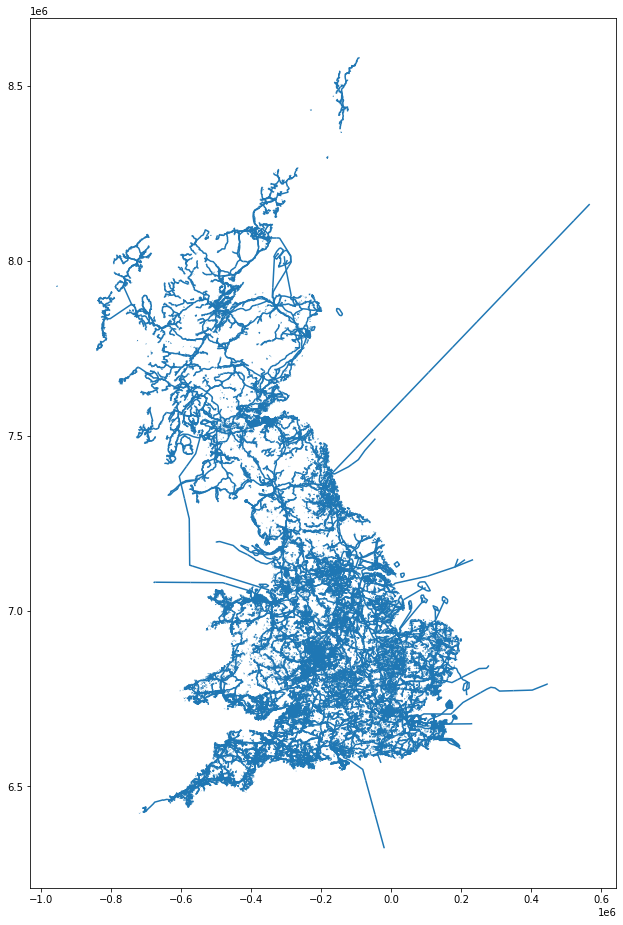

In [11]:
powerlines.plot(figsize=(16,16))

In [12]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_line osm WHERE power IS NOT NULL AND (power = 'line')"
jobman.create_new_pg_to_x(sql=sql, format='GPKG', filename=f'{country}_powerline.gpkg')

In [ ]:
jobman.get_jobs(df=True)

In [13]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_point osm WHERE power IS NOT NULL"
pg_interface = pgi.PgInterface()
conn = pg_interface.get_connection()
powerpoints = gpd.GeoDataFrame.from_postgis(sql, conn)

<AxesSubplot:>

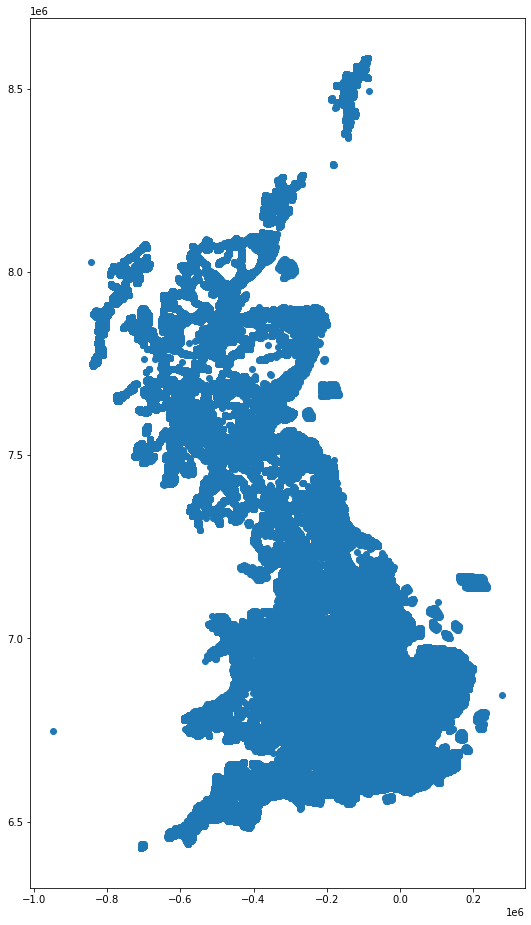

In [15]:
powerpoints.plot(figsize=(16, 16))

In [20]:
sql = f"SELECT osm.way AS geom, osm.* FROM {country}power.planet_osm_point osm WHERE power IS NOT NULL"
jobman.create_new_pg_to_x(sql=sql, format='GPKG', filename=f'{country}_powerpoint.gpkg')

In [21]:
jobman.get_jobs(df=True)

,UUID,Name,Job Type,Date created,Date started,Date finished,Priority,Status
0,bb55ec4d-4bd3-4282-9522-907c7674a052,Load OSM from GB,osm2pg,"Mon, 14 Feb 2022 15:06:26 GMT",None,None,42,Failed
1,274d8088-26a5-4000-aca4-e5a3662d1387,Load OSM from gb,osm2pg,"Mon, 14 Feb 2022 15:08:52 GMT",None,"Mon, 14 Feb 2022 15:49:52 GMT",42,Finished
2,0e657db1-d3de-4a2a-9011-209d844d5746,Export PG,pg2x,"Mon, 14 Feb 2022 16:28:35 GMT",None,"Mon, 14 Feb 2022 16:28:46 GMT",42,Finished
3,97487a83-7f3a-40ea-b03c-d2310fc792ae,Export PG,pg2x,"Mon, 14 Feb 2022 16:29:24 GMT",None,"Mon, 14 Feb 2022 16:29:54 GMT",42,Finished
4,4924b512-9ccf-4eef-b3a6-9cb6b3eae250,Export PG,pg2x,"Mon, 14 Feb 2022 20:20:52 GMT",None,"Mon, 14 Feb 2022 20:21:22 GMT",42,Finished
5,c5e880b1-afe3-42d9-9e50-aca9d9621bc2,Export PG,pg2x,"Mon, 14 Feb 2022 20:21:53 GMT",None,"Mon, 14 Feb 2022 20:22:30 GMT",42,Finished
6,44906320-bf3c-4a41-9a4e-3bc92c3b18bd,Export PG,pg2x,"Mon, 14 Feb 2022 20:22:47 GMT",None,None,42,Started
7,6ed1f8f4-d52d-4a76-9660-123dc6c857ad,Export PG,pg2x,"Wed, 09 Feb 2022 15:17:14 GMT",None,"Wed, 09 Feb 2022 15:17:20 GMT",42,Finished
8,8409297f-1bda-4bb5-8881-c5bf0a8ec54a,Load OSM from GB,osm2pg,"Mon, 14 Feb 2022 15:02:20 GMT",None,None,42,Failed
9,89d6a86b-d5a9-4ce5-85e0-06441306bdfc,Load OSM from GB,osm2pg,"Mon, 14 Feb 2022 15:02:45 GMT",None,None,42,Failed
